# Importing the libraries

In [72]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
import time
import regex
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score,precision_score,recall_score,f1_score,mean_absolute_error

#### Import the dataset

In [73]:
df = pd.read_csv("adbrew_assignment_data.csv")

#### Analyzing the dataset features and rows

In [74]:
df.head()

,spend,clicks,impressions,sales,orders,dt,id
0,0.0,0,1,0.0,0,24-07-2022,6.016817e+10
1,0.0,0,7,0.0,0,29-07-2022,6.016817e+10
2,0.0,0,1,0.0,0,30-07-2022,6.016817e+10
3,0.0,0,1,0.0,0,01-08-2022,6.016817e+10
4,0.0,0,1,0.0,0,03-08-2022,6.016817e+10


In [75]:
df['dt'].unique()
df["ROAS"] = df["sales"]/df['spend']
df.describe()

,spend,clicks,impressions,sales,orders,id,ROAS
count,266273.000000,266273.000000,266273.000000,266273.000000,266273.000000,2.662730e+05,86136.0
mean,55.553022,6.176687,817.396616,459.327022,0.460730,1.399982e+14,inf
std,455.305752,34.647302,5312.096345,3337.172684,2.980232,8.014344e+13,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,6.016817e+10,0.0
25%,0.000000,0.000000,3.000000,0.000000,0.000000,7.213490e+13,0.0
50%,0.000000,0.000000,12.000000,0.000000,0.000000,1.380980e+14,0.0
75%,8.600000,2.000000,83.000000,0.000000,0.000000,2.095590e+14,0.0
max,49380.180000,2226.000000,508454.000000,293942.560000,232.000000,2.813040e+14,inf


In [76]:
df.isna().sum()

spend               0
clicks              0
impressions         0
sales               0
orders              0
dt                  0
id                  0
ROAS           180137
dtype: int64

###### Data Cleaning

In [77]:
df['ROAS'].fillna(0,inplace = True)
df["bid"] = df['spend']/df['clicks']
df['price'] = df['sales'] / df['orders']
df['bid'].fillna(int(0),inplace = True)
df['price'].fillna(0,inplace = True)

In [78]:
df1 = df[['spend', 'clicks', 'impressions', 'sales', 'orders', 'ROAS',
       'bid', 'price','dt','id']]

In [79]:
def clean_dataset(u):
    assert isinstance(u, pd.DataFrame)
    u.dropna(inplace=True)
    indices_to_keep = ~u.isin([np.nan, np.inf, -np.inf]).any(1)
    return u[indices_to_keep]
    

In [80]:
df2 = clean_dataset(df1)

In [81]:
df2.dtypes

spend          float64
clicks           int64
impressions      int64
sales          float64
orders           int64
ROAS           float64
bid            float64
price          float64
dt              object
id             float64
dtype: object

In [82]:
df2['clicks']  = df2['clicks'].astype(np.float64)
df2['impressions']  = df2['impressions'].astype(np.float64)
df2['orders']  = df2['orders'].astype(np.float64)

In [83]:
df2['date'] =  pd.to_datetime(df2['dt'],infer_datetime_format=True)
df2['date']
df2.drop(columns = 'dt',inplace = True)

In [84]:
df2.dtypes

spend                 float64
clicks                float64
impressions           float64
sales                 float64
orders                float64
ROAS                  float64
bid                   float64
price                 float64
id                    float64
date           datetime64[ns]
dtype: object

### Outlier Handling

In [13]:
def outlier_handler(X):
    for i in X.columns:    
        q1 = np.percentile(X[i],25,interpolation  = 'midpoint')
        q3 = np.percentile(X[i],75,interpolation  = 'midpoint')
        IQR = q3-q1
        # Upper bound
        upper = np.where(X[i] >= (q3+1.5*IQR))
        # Lower bound
        lower = np.where(X[i] <= (q1-1.5*IQR))
        try:
            X.drop(upper[0], inplace = True)
            X.drop(lower[0], inplace = True)
        except:pass 

In [14]:
outlier_handler(df2)

### Remove Extra Outliers from each feature

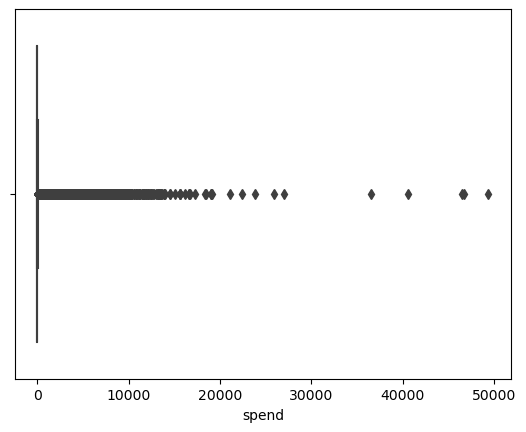

In [109]:
sns.boxplot(df2["spend"])
a = df2[(df2["spend"]>700)].index
for i in a:
    try:
        df2.drop(i,inplace = True)
    except:pass

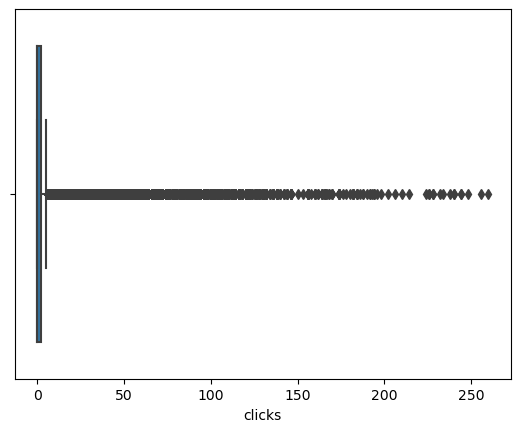

In [110]:
sns.boxplot(df2["clicks"])
b = df2[df2["clicks"]>50].index
for i in b:
    try:
        df2.drop(i,inplace = True)
    except:pass

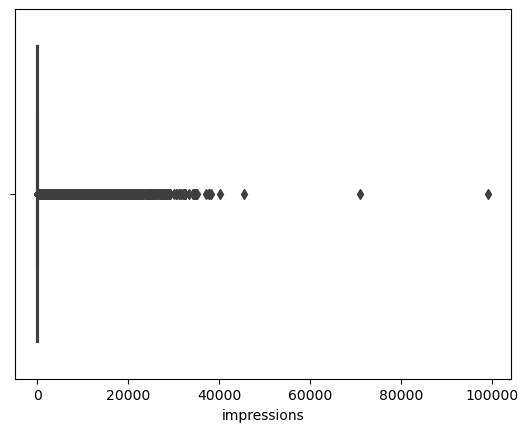

In [111]:
sns.boxplot(df2["impressions"])
c = df2[df2["impressions"]>20000].index
for i in c:
    try:
        df2.drop(i,inplace = True)
    except:pass

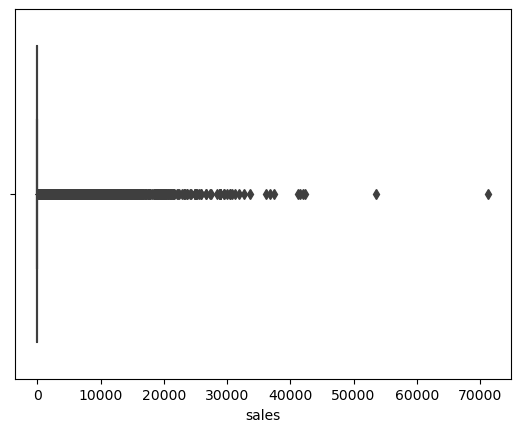

In [112]:
sns.boxplot(df2["sales"])
d = df2[df2["sales"]>5000].index
for i in d:
    try:
        df2.drop(i,inplace = True)
    except:pass

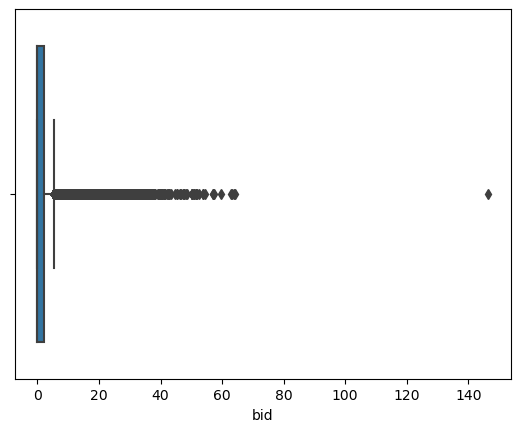

In [113]:
sns.boxplot(df2["bid"])
e = df2[df2["bid"]>27].index
for i in e:
    try:
        df2.drop(i,inplace = True)
    except:pass

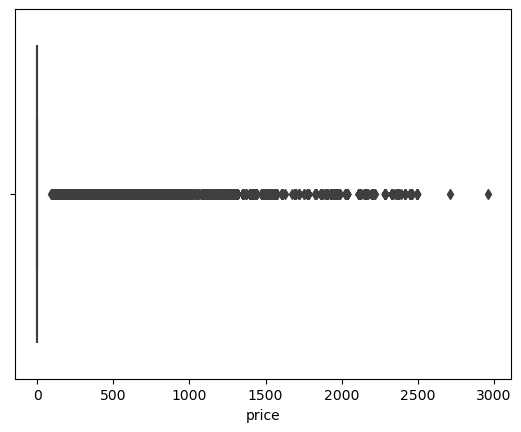

In [114]:
sns.boxplot(df2["price"])
f = df2[df2["price"]>1000].index
for i in f:
    try:
        df2.drop(i,inplace = True)
    except:pass

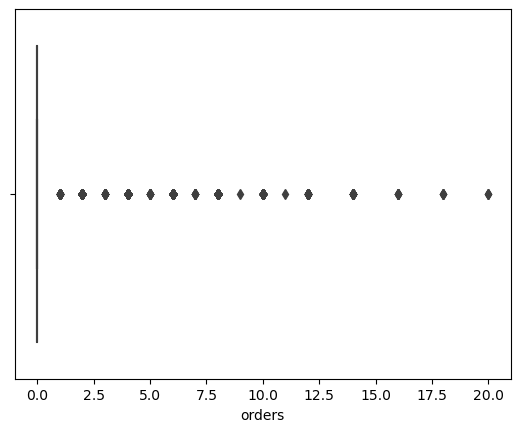

In [115]:
sns.boxplot(df2["orders"])
g = df2[df2["orders"]>12].index
for i in g:
    try:
        df2.drop(i,inplace = True)
    except:pass

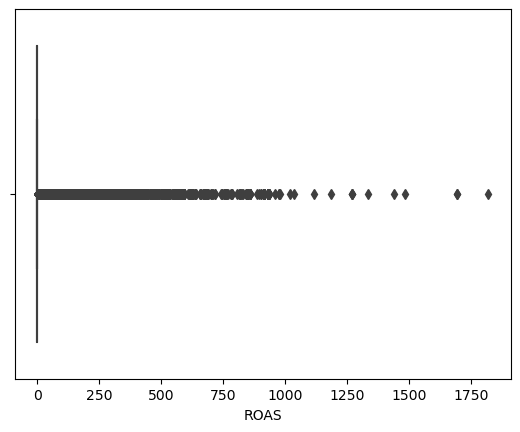

In [116]:
sns.boxplot(df2["ROAS"])
h = df2[df2["ROAS"]>200].index
for i in h:
    try:
        df2.drop(i,inplace = True)
    except:pass

In [117]:
df2

,spend,clicks,impressions,sales,orders,ROAS,bid,price
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
266268,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
266269,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
266270,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
266271,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0


### Multivariate Regression

In [15]:
X = df2[["spend","clicks","impressions","sales","ROAS","price","orders"]]
Y = df2[["bid"]]

In [119]:
# clean the dataset again 
X_new = clean_dataset(X)
Y_new = clean_dataset(Y)

#### Perform the train test split

In [120]:
x_train,x_test,y_train,y_test = train_test_split(X_new,Y_new,test_size =0.3,random_state = 42)

###### Training the model

In [121]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

##### Predictions

In [122]:
predicted = model.predict(x_test)
predicted

array([[ 0.3660201 ],
       [ 0.36122652],
       [-0.80896407],
       ...,
       [ 0.37205645],
       [ 0.36673025],
       [ 0.36406716]])

#### Score

In [123]:
mse = mean_squared_error(y_test,predicted)
r2 = r2_score(y_test,predicted)
print(f"Mean Squared Error : {mse}")
print(f"r2_score : {r2}")

Mean Squared Error : 54.289813667990984
r2_score : 0.5424519785101796


#### Saving the cleaned dataset into a csv file

In [129]:
df2.to_csv("new_adbrew.csv")

## Building a predictive system

In [130]:
def predict(a):
    a.fit(x_train,y_train)
    spend = float(input("Enter the spend value: "))
    clicks = float(input("Enter the clicks value: "))
    impressions = float(input("Enter the impressions value: "))
    sales = float(input("Enter the sales value: "))
    bid = float(input("Enter the bid value: "))
    price = float(input("Enter the price value: "))
    orders = float(input("Enter the orders value: "))
    return a.predict([[spend,clicks,impressions,sales,bid,price,orders]])

In [131]:
predict(model)

Enter the spend value: 132
Enter the clicks value: 312
Enter the impressions value: 23
Enter the sales value: 235
Enter the bid value: 1
Enter the price value: 5432
Enter the orders value: 253


array([[1439.43679089]])

In [132]:
model.score(X_new,Y_new)

0.5455898069197668

### Working on the cleaned dataset

In [16]:
df2 = pd.read_csv("new_adbrew.csv")
df2.drop(columns = "Unnamed: 0",inplace = True)
df2.head()

,spend,clicks,impressions,sales,orders,ROAS,bid,price
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


#### Splitting the dataset df2

In [17]:
X = df2[["spend","clicks", "impressions", "sales", "orders","ROAS","price"]]
Y = df2[["bid"]]
x = X.columns
x

Index(['spend', 'clicks', 'impressions', 'sales', 'orders', 'ROAS', 'price'], dtype='object')

###### Making table for the records

In [18]:
final_dict = {"Feature":[],"Score":[],"Model_name":[],"rmse_val":[],"r2_score":[],"mse":[],"mae":[]}
def add_record(df,feature,model,rmse,r2,mse,mae):
    df['Feature'].append(feature)
    df["Score"].append(score)
    df["Model_name"].append(model)
    df['rmse_val'].append(rmse)
    df["r2_score"].append(r2)
    df["mse"].append(mse)
    df['mae'].append(mae)

# Model Building

### Simple Linear Regression

In [21]:
new_y = Y[["bid"]]

In [22]:
for i in X.columns:
    new_x = X[[i]]
    new_y = Y[["bid"]]
    # Perform the train test split
    
    x_train,x_test,y_train,y_test = train_test_split(new_x,new_y,test_size = 0.3,random_state = 42)
    model = LinearRegression()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    score = [model.score(x_train,y_train),model.score(x_test,y_test)]
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    add_record(final_dict,i,"Simple_Linear",rmse,r2,mse,mae)

In [23]:
pd.DataFrame(final_dict)

,Feature,Score,Model_name,rmse_val,r2_score,mse,mae
0,spend,"[0.38572223845507747, 0.3897474622289536]",Simple_Linear,2.714949,0.389747,7.370947,1.739110
1,clicks,"[0.262118183667836, 0.2591410148637857]",Simple_Linear,2.991401,0.259141,8.948479,1.834484
2,impressions,"[0.14930971384449854, 0.14901780870620684]",Simple_Linear,3.206026,0.149018,10.278604,2.160954
3,sales,"[0.045984712589850596, 0.043761557411078233]",Simple_Linear,3.398521,0.043762,11.549944,2.346280
4,orders,"[0.049264921405259954, 0.045765537196348016]",Simple_Linear,3.394958,0.045766,11.525739,2.337936
5,ROAS,"[0.012474538261804446, 0.011538470080529994]",Simple_Linear,3.455308,0.011538,11.939151,2.421495
6,price,"[0.050547890405432505, 0.048975856224561465]",Simple_Linear,3.389242,0.048976,11.486963,2.334916


### Multiple linear regression

In [25]:
df2.columns

Index(['spend', 'clicks', 'impressions', 'sales', 'orders', 'ROAS', 'bid',
       'price'],
      dtype='object')

In [27]:
for i in X.columns:
    
    new = X[['spend','sales','ROAS']]
    if i in new.columns:
        new_x = X.drop(i,axis = 1)
    new_y = Y[['bid']]    
    # Perform the train test split
    
    x_train,x_test,y_train,y_test = train_test_split(new_x,new_y,test_size = 0.3,random_state = 42)
    model = LinearRegression()
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    
    score = [model.score(x_train,y_train),model.score(x_test,y_test)]
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    r2 = r2_score(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    add_record(final_dict,i,"Multiple Regression",rmse,r2,mse,mae)

In [28]:
pd.DataFrame(final_dict)

,Feature,Score,Model_name,rmse_val,r2_score,mse,mae
0,spend,"[0.38572223845507747, 0.3897474622289536]",Simple_Linear,2.714949,0.389747,7.370947,1.739110
1,clicks,"[0.262118183667836, 0.2591410148637857]",Simple_Linear,2.991401,0.259141,8.948479,1.834484
2,impressions,"[0.14930971384449854, 0.14901780870620684]",Simple_Linear,3.206026,0.149018,10.278604,2.160954
3,sales,"[0.045984712589850596, 0.043761557411078233]",Simple_Linear,3.398521,0.043762,11.549944,2.346280
4,orders,"[0.049264921405259954, 0.045765537196348016]",Simple_Linear,3.394958,0.045766,11.525739,2.337936
5,ROAS,"[0.012474538261804446, 0.011538470080529994]",Simple_Linear,3.455308,0.011538,11.939151,2.421495
6,price,"[0.050547890405432505, 0.048975856224561465]",Simple_Linear,3.389242,0.048976,11.486963,2.334916
7,spend,"[0.2741878723044422, 0.2715007664738244]",Multiple Regression,2.966343,0.271501,8.799191,1.811031
8,clicks,"[0.2741878723044422, 0.2715007664738244]",Multiple Regression,2.966343,0.271501,8.799191,1.811031
9,impressions,"[0.2741878723044422, 0.2715007664738244]",Multiple Regression,2.966343,0.271501,8.799191,1.811031


In [30]:
X = df2[["spend","clicks", "impressions", "sales", "orders","ROAS","price"]]
Y = df2[["bid"]]
new_y = Y[['bid']]  
a = ["clicks","impressions","orders","price"]

### Lasso 

In [31]:
for i in a:

    new_x = X[['spend','sales','ROAS',i]]
 
    # Perform the train test split
    
    x_train,x_test,y_train,y_test = train_test_split(new_x,new_y,test_size = 0.3,random_state = 42)
    
    # Standarizing the dataset
    
    scaler_X = StandardScaler()
    scaler_Y = StandardScaler()
    x_train_scaled = scaler_X.fit_transform(x_train)
    y_train_scaled = scaler_Y.fit_transform(y_train)
    x_test_scaled = scaler_X.transform(x_test)
    y_test_scaled = scaler_Y.transform(y_test)
    
    # Model training 
    model = Lasso(alpha = 0.1)
    model.fit(x_train_scaled,y_train_scaled)
    y_pred = model.predict((x_test_scaled))
    
    
    # Finding the score 
    score = [model.score(x_train_scaled,y_train_scaled),model.score(x_test_scaled,y_test_scaled)]
    mse = mean_squared_error(y_test_scaled,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_scaled,y_pred))
    r2 = r2_score(y_test_scaled,y_pred)
    mae = mean_absolute_error(y_test_scaled,y_pred)
    add_record(final_dict,i,"Lasso Regression",rmse,r2,mse,mae)

In [32]:
pd.DataFrame(final_dict)

,Feature,Score,Model_name,rmse_val,r2_score,mse,mae
0,spend,"[0.38572223845507747, 0.3897474622289536]",Simple_Linear,2.714949,0.389747,7.370947,1.739110
1,clicks,"[0.262118183667836, 0.2591410148637857]",Simple_Linear,2.991401,0.259141,8.948479,1.834484
2,impressions,"[0.14930971384449854, 0.14901780870620684]",Simple_Linear,3.206026,0.149018,10.278604,2.160954
3,sales,"[0.045984712589850596, 0.043761557411078233]",Simple_Linear,3.398521,0.043762,11.549944,2.346280
4,orders,"[0.049264921405259954, 0.045765537196348016]",Simple_Linear,3.394958,0.045766,11.525739,2.337936
5,ROAS,"[0.012474538261804446, 0.011538470080529994]",Simple_Linear,3.455308,0.011538,11.939151,2.421495
6,price,"[0.050547890405432505, 0.048975856224561465]",Simple_Linear,3.389242,0.048976,11.486963,2.334916
7,spend,"[0.2741878723044422, 0.2715007664738244]",Multiple Regression,2.966343,0.271501,8.799191,1.811031
8,clicks,"[0.2741878723044422, 0.2715007664738244]",Multiple Regression,2.966343,0.271501,8.799191,1.811031
9,impressions,"[0.2741878723044422, 0.2715007664738244]",Multiple Regression,2.966343,0.271501,8.799191,1.811031


### Ridge Regression

In [33]:
for i in a:

    new_x = X[['spend','sales','ROAS',i]]
 
    # Perform the train test split
    
    x_train,x_test,y_train,y_test = train_test_split(new_x,new_y,test_size = 0.3,random_state = 42)
    
    # Standarizing the dataset
    
    scaler_X = StandardScaler()
    scaler_Y = StandardScaler()
    x_train_scaled = scaler_X.fit_transform(x_train)
    y_train_scaled = scaler_Y.fit_transform(y_train)
    x_test_scaled = scaler_X.transform(x_test)
    y_test_scaled = scaler_Y.transform(y_test)
    
    # Model training 
    model = Ridge(alpha = 0.1)
    model.fit(x_train_scaled,y_train_scaled)
    y_pred = model.predict((x_test_scaled))
    
    
    # Finding the score 
    score = [model.score(x_train_scaled,y_train_scaled),model.score(x_test_scaled,y_test_scaled)]
    mse = mean_squared_error(y_test_scaled,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_scaled,y_pred))
    r2 = r2_score(y_test_scaled,y_pred)
    mae = mean_absolute_error(y_test_scaled,y_pred)
    add_record(final_dict,i,"Ridge Regression",rmse,r2,mse,mae)

In [34]:
pd.DataFrame(final_dict)

,Feature,Score,Model_name,rmse_val,r2_score,mse,mae
0,spend,"[0.38572223845507747, 0.3897474622289536]",Simple_Linear,2.714949,0.389747,7.370947,1.739110
1,clicks,"[0.262118183667836, 0.2591410148637857]",Simple_Linear,2.991401,0.259141,8.948479,1.834484
2,impressions,"[0.14930971384449854, 0.14901780870620684]",Simple_Linear,3.206026,0.149018,10.278604,2.160954
3,sales,"[0.045984712589850596, 0.043761557411078233]",Simple_Linear,3.398521,0.043762,11.549944,2.346280
4,orders,"[0.049264921405259954, 0.045765537196348016]",Simple_Linear,3.394958,0.045766,11.525739,2.337936
5,ROAS,"[0.012474538261804446, 0.011538470080529994]",Simple_Linear,3.455308,0.011538,11.939151,2.421495
6,price,"[0.050547890405432505, 0.048975856224561465]",Simple_Linear,3.389242,0.048976,11.486963,2.334916
7,spend,"[0.2741878723044422, 0.2715007664738244]",Multiple Regression,2.966343,0.271501,8.799191,1.811031
8,clicks,"[0.2741878723044422, 0.2715007664738244]",Multiple Regression,2.966343,0.271501,8.799191,1.811031
9,impressions,"[0.2741878723044422, 0.2715007664738244]",Multiple Regression,2.966343,0.271501,8.799191,1.811031


### Elastic Net

In [35]:
for i in a:

    new_x = X[['spend','sales','ROAS',i]]
 
    # Perform the train test split
    
    x_train,x_test,y_train,y_test = train_test_split(new_x,new_y,test_size = 0.3,random_state = 42)
    
    # Standarizing the dataset
    
    scaler_X = StandardScaler()
    scaler_Y = StandardScaler()
    x_train_scaled = scaler_X.fit_transform(x_train)
    y_train_scaled = scaler_Y.fit_transform(y_train)
    x_test_scaled = scaler_X.transform(x_test)
    y_test_scaled = scaler_Y.transform(y_test)
    
    # Model training 
    model = ElasticNet(alpha = 0.1)
    model.fit(x_train_scaled,y_train_scaled)
    y_pred = model.predict((x_test_scaled))
    
    
    # Finding the score 
    score = [model.score(x_train_scaled,y_train_scaled),model.score(x_test_scaled,y_test_scaled)]
    mse = mean_squared_error(y_test_scaled,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_scaled,y_pred))
    r2 = r2_score(y_test_scaled,y_pred)
    mae = mean_absolute_error(y_test_scaled,y_pred)
    add_record(final_dict,i,"ElasticNet Regression",rmse,r2,mse,mae)

In [36]:
pd.DataFrame(final_dict)

,Feature,Score,Model_name,rmse_val,r2_score,mse,mae
0,spend,"[0.38572223845507747, 0.3897474622289536]",Simple_Linear,2.714949,0.389747,7.370947,1.739110
1,clicks,"[0.262118183667836, 0.2591410148637857]",Simple_Linear,2.991401,0.259141,8.948479,1.834484
2,impressions,"[0.14930971384449854, 0.14901780870620684]",Simple_Linear,3.206026,0.149018,10.278604,2.160954
3,sales,"[0.045984712589850596, 0.043761557411078233]",Simple_Linear,3.398521,0.043762,11.549944,2.346280
4,orders,"[0.049264921405259954, 0.045765537196348016]",Simple_Linear,3.394958,0.045766,11.525739,2.337936
5,ROAS,"[0.012474538261804446, 0.011538470080529994]",Simple_Linear,3.455308,0.011538,11.939151,2.421495
6,price,"[0.050547890405432505, 0.048975856224561465]",Simple_Linear,3.389242,0.048976,11.486963,2.334916
7,spend,"[0.2741878723044422, 0.2715007664738244]",Multiple Regression,2.966343,0.271501,8.799191,1.811031
8,clicks,"[0.2741878723044422, 0.2715007664738244]",Multiple Regression,2.966343,0.271501,8.799191,1.811031
9,impressions,"[0.2741878723044422, 0.2715007664738244]",Multiple Regression,2.966343,0.271501,8.799191,1.811031


### Using Decision Tree Model

In [37]:
for i in a:

    new_x = X[['spend','sales','ROAS',i]]
 
    # Perform the train test split
    
    x_train,x_test,y_train,y_test = train_test_split(new_x,new_y,test_size = 0.3,random_state = 42)
    
    # Standarizing the dataset
    
    scaler_X = StandardScaler()
    scaler_Y = StandardScaler()
    x_train_scaled = scaler_X.fit_transform(x_train)
    y_train_scaled = scaler_Y.fit_transform(y_train)
    x_test_scaled = scaler_X.transform(x_test)
    y_test_scaled = scaler_Y.transform(y_test)
    
    # Model training 
    model = DecisionTreeRegressor(ccp_alpha = 0.1)
    model.fit(x_train_scaled,y_train_scaled)
    y_pred = model.predict((x_test_scaled))
    
    
    # Finding the score 
    score = [model.score(x_train_scaled,y_train_scaled),model.score(x_test_scaled,y_test_scaled)]
    mse = mean_squared_error(y_test_scaled,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_scaled,y_pred))
    r2 = r2_score(y_test_scaled,y_pred)
    mae = mean_absolute_error(y_test_scaled,y_pred)
    add_record(final_dict,i,"DecisionTreeRegression",rmse,r2,mse,mae)

In [38]:
pd.DataFrame(final_dict)

,Feature,Score,Model_name,rmse_val,r2_score,mse,mae
0,spend,"[0.38572223845507747, 0.3897474622289536]",Simple_Linear,2.714949,0.389747,7.370947,1.739110
1,clicks,"[0.262118183667836, 0.2591410148637857]",Simple_Linear,2.991401,0.259141,8.948479,1.834484
2,impressions,"[0.14930971384449854, 0.14901780870620684]",Simple_Linear,3.206026,0.149018,10.278604,2.160954
3,sales,"[0.045984712589850596, 0.043761557411078233]",Simple_Linear,3.398521,0.043762,11.549944,2.346280
4,orders,"[0.049264921405259954, 0.045765537196348016]",Simple_Linear,3.394958,0.045766,11.525739,2.337936
5,ROAS,"[0.012474538261804446, 0.011538470080529994]",Simple_Linear,3.455308,0.011538,11.939151,2.421495
6,price,"[0.050547890405432505, 0.048975856224561465]",Simple_Linear,3.389242,0.048976,11.486963,2.334916
7,spend,"[0.2741878723044422, 0.2715007664738244]",Multiple Regression,2.966343,0.271501,8.799191,1.811031
8,clicks,"[0.2741878723044422, 0.2715007664738244]",Multiple Regression,2.966343,0.271501,8.799191,1.811031
9,impressions,"[0.2741878723044422, 0.2715007664738244]",Multiple Regression,2.966343,0.271501,8.799191,1.811031


### RandomForestRegressor

In [39]:
for i in a:

    new_x = X[['spend','sales','ROAS',i]]
 
    # Perform the train test split
    
    x_train,x_test,y_train,y_test = train_test_split(new_x,new_y,test_size = 0.3,random_state = 42)
    
    # Standarizing the dataset
    
    scaler_X = StandardScaler()
    scaler_Y = StandardScaler()
    x_train_scaled = scaler_X.fit_transform(x_train)
    y_train_scaled = scaler_Y.fit_transform(y_train)
    x_test_scaled = scaler_X.transform(x_test)
    y_test_scaled = scaler_Y.transform(y_test)
    
    # Model training 
    model = RandomForestRegressor(ccp_alpha = 0.1)
    model.fit(x_train_scaled,y_train_scaled)
    y_pred = model.predict((x_test_scaled))
    
    
    # Finding the score 
    score = [model.score(x_train_scaled,y_train_scaled),model.score(x_test_scaled,y_test_scaled)]
    mse = mean_squared_error(y_test_scaled,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_scaled,y_pred))
    r2 = r2_score(y_test_scaled,y_pred)
    mae = mean_absolute_error(y_test_scaled,y_pred)
    add_record(final_dict,i,"RandomForestRegressor",rmse,r2,mse,mae)

In [40]:
pd.DataFrame(final_dict)

,Feature,Score,Model_name,rmse_val,r2_score,mse,mae
0,spend,"[0.38572223845507747, 0.3897474622289536]",Simple_Linear,2.714949,0.389747,7.370947,1.739110
1,clicks,"[0.262118183667836, 0.2591410148637857]",Simple_Linear,2.991401,0.259141,8.948479,1.834484
2,impressions,"[0.14930971384449854, 0.14901780870620684]",Simple_Linear,3.206026,0.149018,10.278604,2.160954
3,sales,"[0.045984712589850596, 0.043761557411078233]",Simple_Linear,3.398521,0.043762,11.549944,2.346280
4,orders,"[0.049264921405259954, 0.045765537196348016]",Simple_Linear,3.394958,0.045766,11.525739,2.337936
5,ROAS,"[0.012474538261804446, 0.011538470080529994]",Simple_Linear,3.455308,0.011538,11.939151,2.421495
6,price,"[0.050547890405432505, 0.048975856224561465]",Simple_Linear,3.389242,0.048976,11.486963,2.334916
7,spend,"[0.2741878723044422, 0.2715007664738244]",Multiple Regression,2.966343,0.271501,8.799191,1.811031
8,clicks,"[0.2741878723044422, 0.2715007664738244]",Multiple Regression,2.966343,0.271501,8.799191,1.811031
9,impressions,"[0.2741878723044422, 0.2715007664738244]",Multiple Regression,2.966343,0.271501,8.799191,1.811031


### using XGBRegressor

In [42]:
for i in a:

    new_x = X[['spend','sales','ROAS',i]]
    new_y = Y[["bid"]]
    # Perform the train test split
    
    x_train,x_test,y_train,y_test = train_test_split(new_x,new_y,test_size = 0.3,random_state = 42)
    
    # Standarizing the dataset
    
    scaler_X = StandardScaler()
    scaler_Y = StandardScaler()
    x_train_scaled = scaler_X.fit_transform(x_train)
    y_train_scaled = scaler_Y.fit_transform(y_train)
    x_test_scaled = scaler_X.transform(x_test)
    y_test_scaled = scaler_Y.transform(y_test)
    
    # Model training 
    model = XGBRegressor()
    model.fit(x_train_scaled,y_train_scaled)
    y_pred = model.predict((x_test_scaled))
    
    
    # Finding the score 
    score = [model.score(x_train_scaled,y_train_scaled),model.score(x_test_scaled,y_test_scaled)]
    mse = mean_squared_error(y_test_scaled,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_scaled,y_pred))
    r2 = r2_score(y_test_scaled,y_pred)
    mae = mean_absolute_error(y_test_scaled,y_pred)
    add_record(final_dict,i,"XGBRegressor",rmse,r2,mse,mae)

In [43]:
pd.DataFrame(final_dict)

,Feature,Score,Model_name,rmse_val,r2_score,mse,mae
0,spend,"[0.38572223845507747, 0.3897474622289536]",Simple_Linear,2.714949,0.389747,7.370947,1.739110
1,clicks,"[0.262118183667836, 0.2591410148637857]",Simple_Linear,2.991401,0.259141,8.948479,1.834484
2,impressions,"[0.14930971384449854, 0.14901780870620684]",Simple_Linear,3.206026,0.149018,10.278604,2.160954
3,sales,"[0.045984712589850596, 0.043761557411078233]",Simple_Linear,3.398521,0.043762,11.549944,2.346280
4,orders,"[0.049264921405259954, 0.045765537196348016]",Simple_Linear,3.394958,0.045766,11.525739,2.337936
5,ROAS,"[0.012474538261804446, 0.011538470080529994]",Simple_Linear,3.455308,0.011538,11.939151,2.421495
6,price,"[0.050547890405432505, 0.048975856224561465]",Simple_Linear,3.389242,0.048976,11.486963,2.334916
7,spend,"[0.2741878723044422, 0.2715007664738244]",Multiple Regression,2.966343,0.271501,8.799191,1.811031
8,clicks,"[0.2741878723044422, 0.2715007664738244]",Multiple Regression,2.966343,0.271501,8.799191,1.811031
9,impressions,"[0.2741878723044422, 0.2715007664738244]",Multiple Regression,2.966343,0.271501,8.799191,1.811031


### using GradientBoostingRegressor

In [44]:
for i in a:

    new_x = X[['spend','sales','ROAS',i]]
 
    # Perform the train test split
    
    x_train,x_test,y_train,y_test = train_test_split(new_x,new_y,test_size = 0.3,random_state = 42)
    
    # Standarizing the dataset
    
    scaler_X = StandardScaler()
    scaler_Y = StandardScaler()
    x_train_scaled = scaler_X.fit_transform(x_train)
    y_train_scaled = scaler_Y.fit_transform(y_train)
    x_test_scaled = scaler_X.transform(x_test)
    y_test_scaled = scaler_Y.transform(y_test)
    
    # Model training 
    model = GradientBoostingRegressor()
    model.fit(x_train_scaled,y_train_scaled)
    y_pred = model.predict((x_test_scaled))
    
    
    # Finding the score 
    score = [model.score(x_train_scaled,y_train_scaled),model.score(x_test_scaled,y_test_scaled)]
    mse = mean_squared_error(y_test_scaled,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_scaled,y_pred))
    r2 = r2_score(y_test_scaled,y_pred)
    mae = mean_absolute_error(y_test_scaled,y_pred)
    add_record(final_dict,i,"GradientBoostingRegressor",rmse,r2,mse,mae)

In [45]:
pd.DataFrame(final_dict)

,Feature,Score,Model_name,rmse_val,r2_score,mse,mae
0,spend,"[0.38572223845507747, 0.3897474622289536]",Simple_Linear,2.714949,0.389747,7.370947,1.739110
1,clicks,"[0.262118183667836, 0.2591410148637857]",Simple_Linear,2.991401,0.259141,8.948479,1.834484
2,impressions,"[0.14930971384449854, 0.14901780870620684]",Simple_Linear,3.206026,0.149018,10.278604,2.160954
3,sales,"[0.045984712589850596, 0.043761557411078233]",Simple_Linear,3.398521,0.043762,11.549944,2.346280
4,orders,"[0.049264921405259954, 0.045765537196348016]",Simple_Linear,3.394958,0.045766,11.525739,2.337936
5,ROAS,"[0.012474538261804446, 0.011538470080529994]",Simple_Linear,3.455308,0.011538,11.939151,2.421495
6,price,"[0.050547890405432505, 0.048975856224561465]",Simple_Linear,3.389242,0.048976,11.486963,2.334916
7,spend,"[0.2741878723044422, 0.2715007664738244]",Multiple Regression,2.966343,0.271501,8.799191,1.811031
8,clicks,"[0.2741878723044422, 0.2715007664738244]",Multiple Regression,2.966343,0.271501,8.799191,1.811031
9,impressions,"[0.2741878723044422, 0.2715007664738244]",Multiple Regression,2.966343,0.271501,8.799191,1.811031


### Using KNN Regressor

In [30]:
for i in a:

    new_x = X[['spend','sales','ROAS',i]]
 
    # Perform the train test split
    
    x_train,x_test,y_train,y_test = train_test_split(new_x,new_y,test_size = 0.3,random_state = 42)
    
    # Standarizing the dataset
    
    scaler_X = StandardScaler()
    scaler_Y = StandardScaler()
    x_train_scaled = scaler_X.fit_transform(x_train)
    y_train_scaled = scaler_Y.fit_transform(y_train)
    x_test_scaled = scaler_X.transform(x_test)
    y_test_scaled = scaler_Y.transform(y_test)
    
    # Model training 
    model = KNeighborsRegressor()
    model.fit(x_train_scaled,y_train_scaled)
    y_pred = model.predict((x_test_scaled))
    
    
    # Finding the score 
    score = [model.score(x_train_scaled,y_train_scaled),model.score(x_test_scaled,y_test_scaled)]
    mse = mean_squared_error(y_test_scaled,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test_scaled,y_pred))
    r2 = r2_score(y_test_scaled,y_pred)
    mae = mean_absolute_error(y_test_scaled,y_pred)
    add_record(final_dict,i,"KNNRegressor",rmse,r2,mse,mae)

In [31]:
pd.DataFrame(final_dict)

,Feature,Score,Model_name,rmse_val,r2_score,mse,mae
0,spend,"[0.005287221513976537, 0.005385408003655168]",Simple_Linear,10.863462,0.005385,118.014806,2.788965
1,clicks,"[0.02263625196940633, 0.022311174489164087]",Simple_Linear,10.770631,0.022311,116.006499,2.660327
2,impressions,"[0.0012056524882259056, 0.001163190806606318]",Simple_Linear,10.886496,0.001163,118.515788,2.846866
3,sales,"[0.39174858729319706, 0.38512935411061244]",Simple_Linear,8.541472,0.385129,72.956742,1.456242
4,orders,"[0.2964936580596138, 0.301445582413022]",Simple_Linear,9.104183,0.301446,82.886140,1.650018
5,bid,"[0.012474538261804113, 0.011331633034519006]",Simple_Linear,10.830940,0.011332,117.309264,2.769413
6,price,"[0.5048061907626418, 0.49907857612173023]",Simple_Linear,7.709490,0.499079,59.436233,1.142714
7,spend,"[0.5409814089735281, 0.5362630241302665]",Multiple Regression,7.417827,0.536263,55.024157,1.810446
8,clicks,"[0.5409814089735281, 0.5362630241302665]",Multiple Regression,7.417827,0.536263,55.024157,1.810446
9,impressions,"[0.5409814089735281, 0.5362630241302665]",Multiple Regression,7.417827,0.536263,55.024157,1.810446


## Visualizing the dataset

In [49]:
# The below Graph for order vs impressions visual analysis

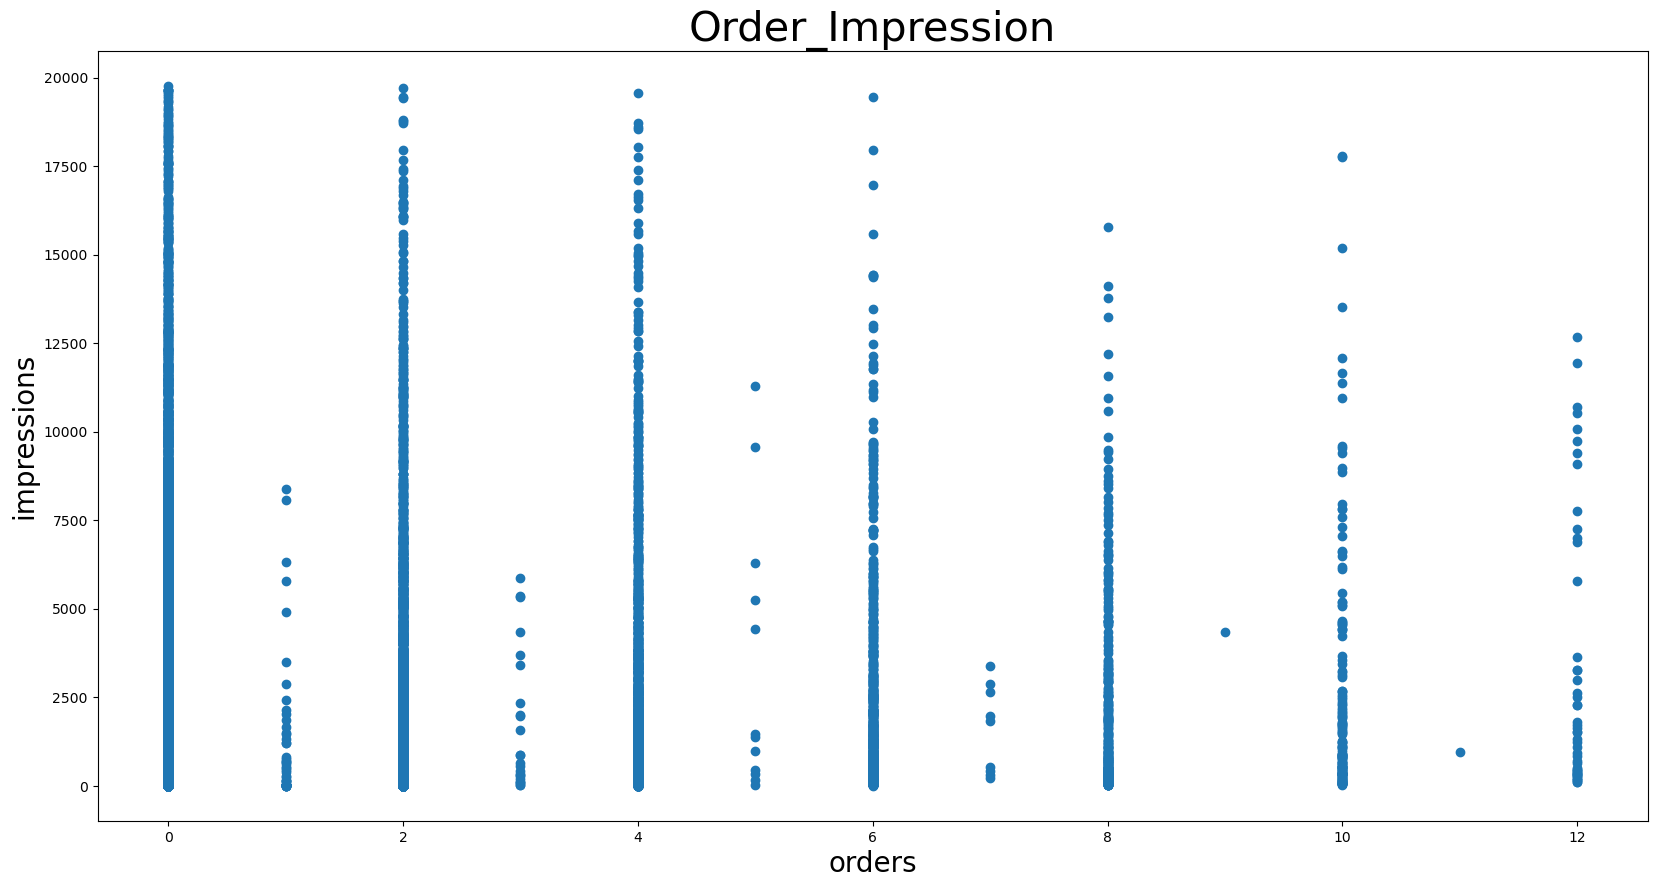

In [46]:
x = df2['orders']
y = df2['impressions']

plt.figure(figsize=(20,10))


plt.title("Order_Impression", fontsize=30)

plt.xlabel("orders",fontsize=20)
plt.ylabel("impressions", fontsize=20)


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

plt.scatter(x, y)

In [47]:
# The below Graph for clicks vs impressions visual analysis

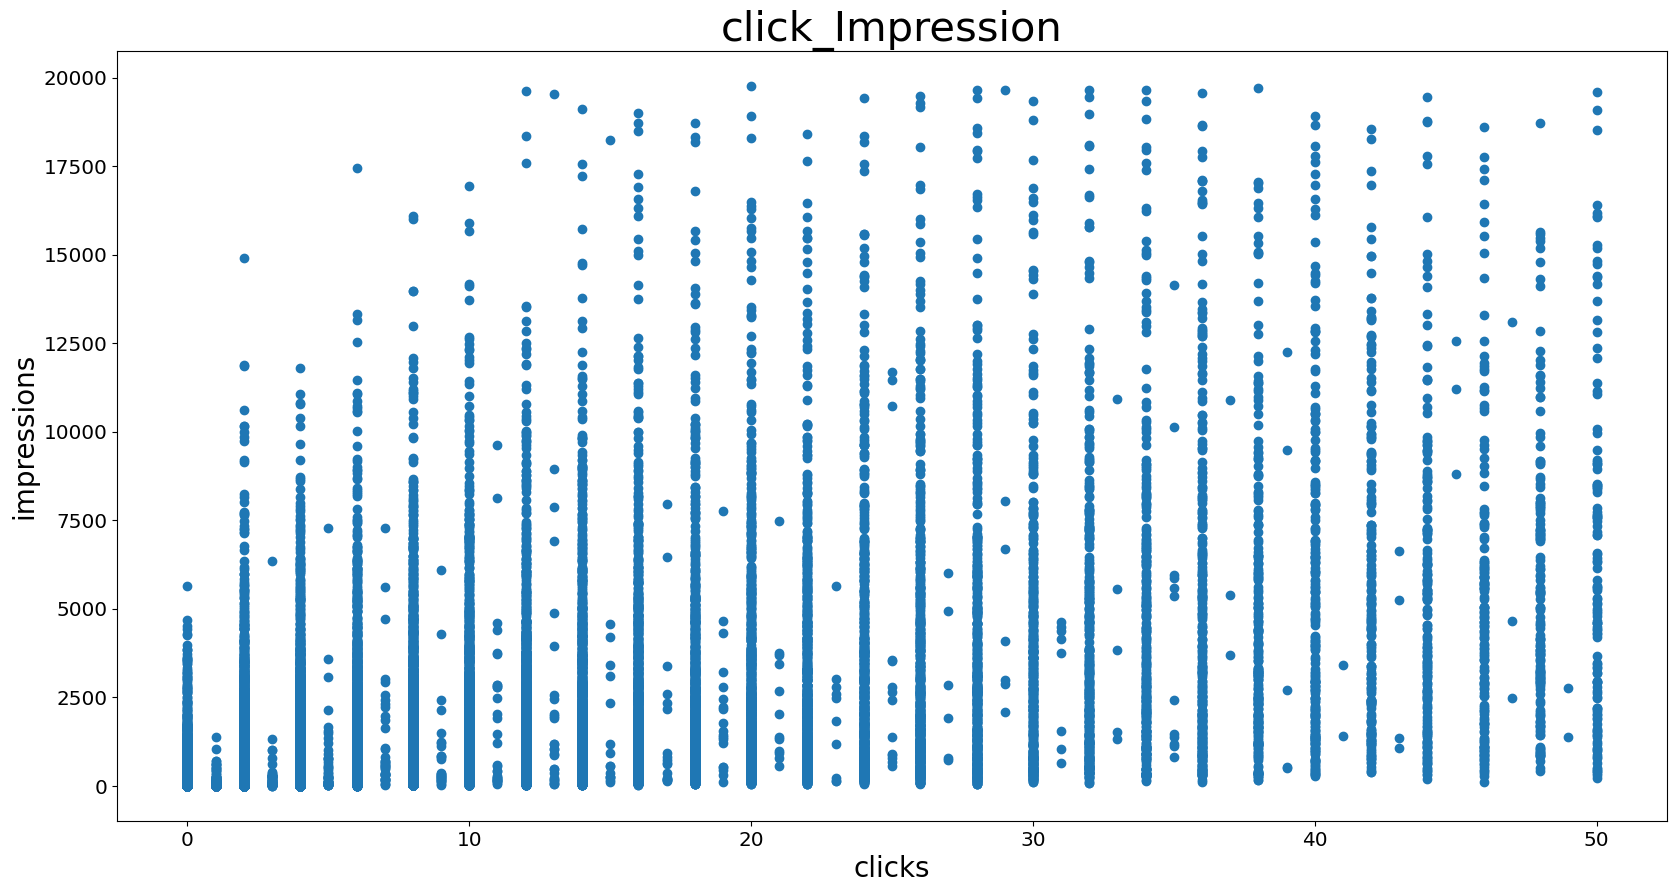

In [48]:
x = df2['clicks']
y = df2['impressions']

plt.figure(figsize=(20,10))


plt.title("click_Impression", fontsize=30)

plt.xlabel("clicks",fontsize=20)
plt.ylabel("impressions", fontsize=20)


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

plt.scatter(x, y)

# Visualizing the dataset on day,month and year and date

In [49]:
### splitting and converting the dt column into datetime

In [50]:
def parse_prefix(line, fmt):
    try:
        t = time.strptime(line, fmt)
    except ValueError as v:
        if len(v.args) > 0 and v.args[0].startswith('unconverted data remains: '):
            line = line[:-(len(v.args[0]) - 26)]
            t = time.strptime(line, fmt)
        else:
            raise
    return t

In [51]:
# Storing the in different lists for future use

In [52]:
l = []
for i in df['dt']:
    t = parse_prefix(i,'%d-%m-%y')
    l.append(t)

# Storing all year in the year list    
year = []
for i in range(len(l)):
    year.append(l[i][0])

# Storing all months in the months list        
month = []
for i in range(len(l)):
    month.append(l[i][1])
    
# Storing all days in the days list    
day = []
for i in range(len(l)):
    day.append(l[i][2])

In [53]:
# Adding the new columns as year,months and days to the original dataframe 

In [54]:
df['year'] = pd.DataFrame(year)
df['month'] = pd.DataFrame(month)
df['day'] = pd.DataFrame(day)

In [55]:
## combining the year ,month and days to a single date in dtype -int format

In [56]:
dates = []
for i in range(len(df['year'])):
    s = ""
    s = s + str(df['day'][i]) + str(df['month'][i]) + str(df['year'][i])
    dates.append(int(s))

In [57]:
# Adding the new columns as dates to the original dataframe 

In [58]:
df['dates'] = pd.DataFrame(dates)
df['InsertedDate'] = pd.to_datetime(df['dates'], format='%d%m%Y')

In [59]:
df["InsertedDate"]

0        2020-07-24
1        2020-07-29
2        2020-07-30
3        2020-08-01
4        2020-08-03
            ...    
266268   2020-11-07
266269   2020-11-08
266270   2020-11-09
266271   2020-07-27
266272   2020-07-28
Name: InsertedDate, Length: 266273, dtype: datetime64[ns]

In [60]:
df5 = clean_dataset(df.drop(columns = ["InsertedDate","dt"],axis = 1))

In [61]:
df5

,spend,clicks,impressions,sales,orders,id,ROAS,bid,price,year,month,day,dates
0,0.0,0.0,1.0,0.0,0.0,6.016817e+10,0.0,0.0,0.0,2020.0,7.0,24.0,2472020.0
1,0.0,0.0,7.0,0.0,0.0,6.016817e+10,0.0,0.0,0.0,2020.0,7.0,29.0,2972020.0
2,0.0,0.0,1.0,0.0,0.0,6.016817e+10,0.0,0.0,0.0,2020.0,7.0,30.0,3072020.0
3,0.0,0.0,1.0,0.0,0.0,6.016817e+10,0.0,0.0,0.0,2020.0,8.0,1.0,182020.0
4,0.0,0.0,1.0,0.0,0.0,6.016817e+10,0.0,0.0,0.0,2020.0,8.0,3.0,382020.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
266268,0.0,0.0,1.0,0.0,0.0,2.811490e+14,0.0,0.0,0.0,2020.0,11.0,7.0,7112020.0
266269,0.0,0.0,3.0,0.0,0.0,2.811490e+14,0.0,0.0,0.0,2020.0,11.0,8.0,8112020.0
266270,0.0,0.0,1.0,0.0,0.0,2.811490e+14,0.0,0.0,0.0,2020.0,11.0,9.0,9112020.0
266271,0.0,0.0,4.0,0.0,0.0,2.813040e+14,0.0,0.0,0.0,2020.0,7.0,27.0,2772020.0


In [62]:
# creating the visual analysis of the clicks per months wise

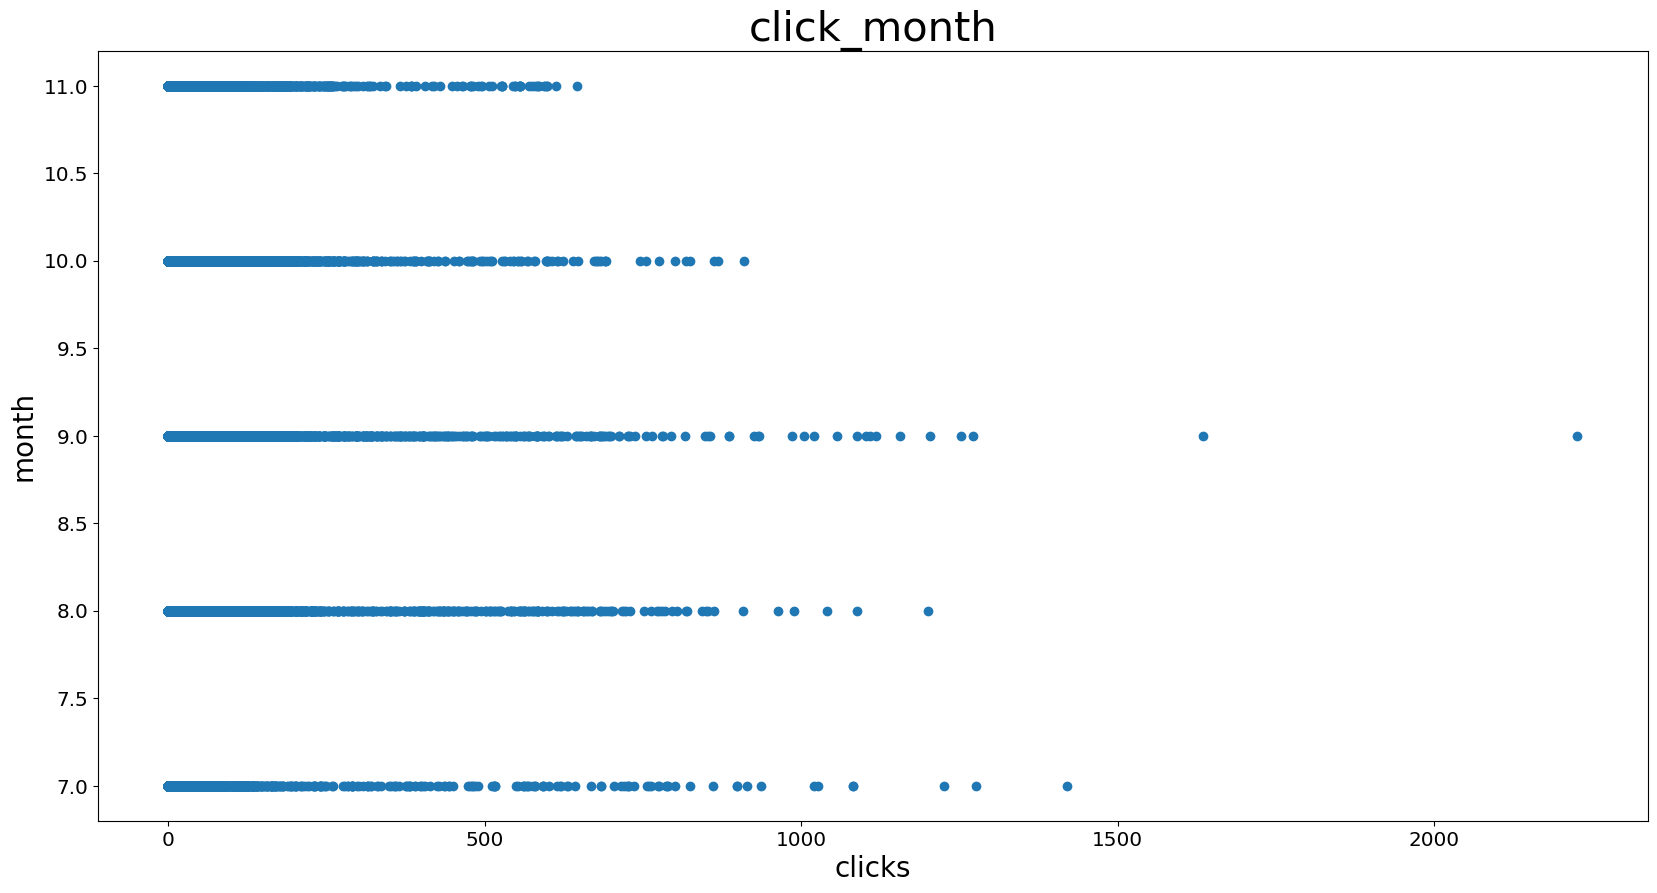

In [63]:
x = df5['clicks']
y = df5['month']

plt.figure(figsize=(20,10))


plt.title("click_month", fontsize=30)

plt.xlabel("clicks",fontsize=20)
plt.ylabel("month", fontsize=20)


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

plt.scatter(x, y)

In [64]:
## Creating the visual analysis for the clicks per Date wise

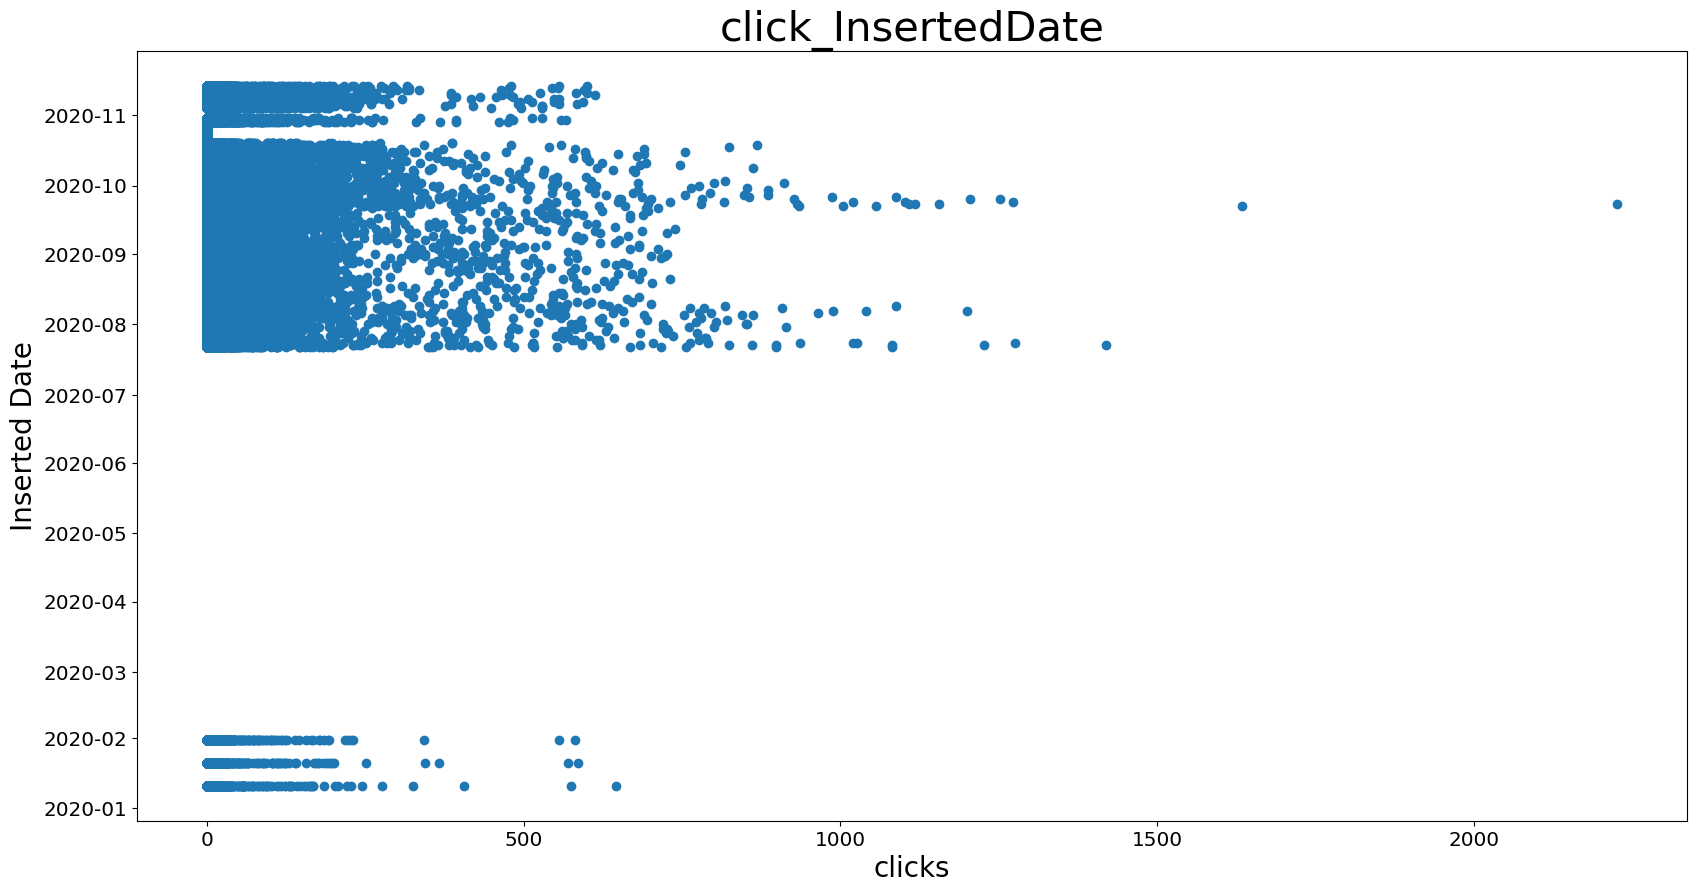

In [65]:
x = df['clicks']
y = df['InsertedDate']

plt.figure(figsize=(20,10))


plt.title("click_InsertedDate", fontsize=30)

plt.xlabel("clicks",fontsize=20)
plt.ylabel("Inserted Date", fontsize=20)


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

plt.scatter(x, y)

In [66]:
## Creating the visual analysis for the impressions per month wise

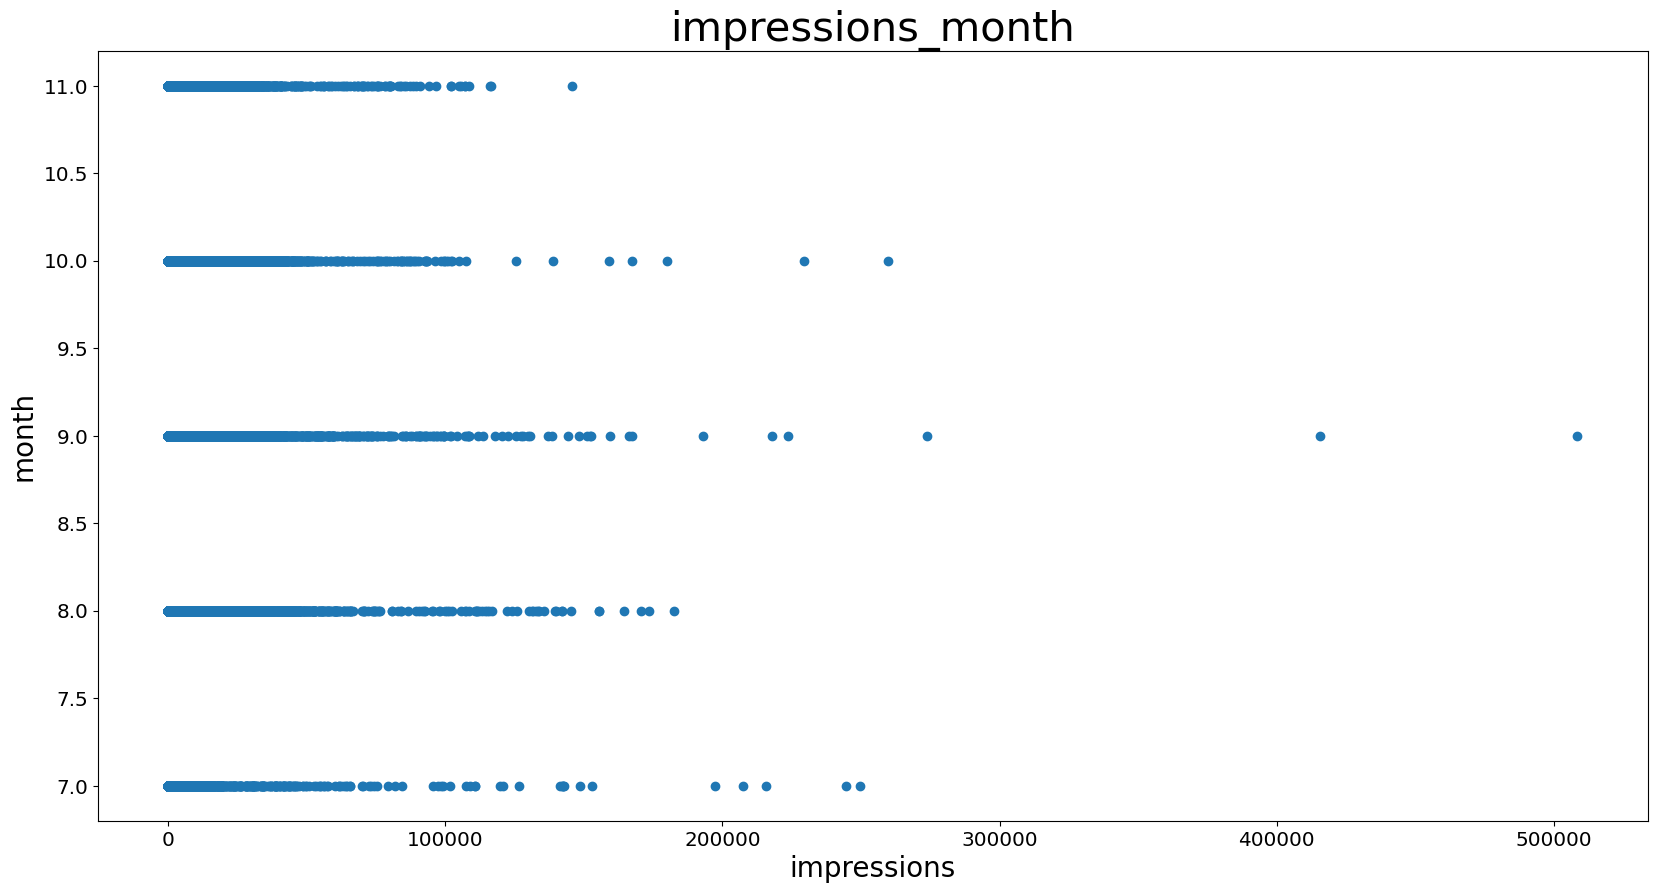

In [67]:
x = df5['impressions']
y = df5['month']

plt.figure(figsize=(20,10))


plt.title("impressions_month", fontsize=30)

plt.xlabel("impressions",fontsize=20)
plt.ylabel("month", fontsize=20)


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

plt.scatter(x, y)

# Building the final Predictive system

In [95]:
def predict(model):
    new_x = X[['spend','sales','clicks','ROAS']]
    new_y = Y[["bid"]]

    # Perform the train test split

    x_train,x_test,y_train,y_test = train_test_split(new_x,new_y,test_size = 0.3,random_state = 42)

    # Standarizing the dataset

    scaler_X = StandardScaler()
    scaler_Y = StandardScaler()
    x_train_scaled = scaler_X.fit_transform(x_train)
    y_train_scaled = scaler_Y.fit_transform(y_train)
    x_test_scaled = scaler_X.transform(x_test)
    y_test_scaled = scaler_Y.transform(y_test)

    # Model training 
    model = model()
    model.fit(x_train_scaled,y_train_scaled)
    y_pred = model.predict((x_test_scaled))


    spend = float(input("Enter the spend value: "))
    sales = float(input("Enter the sales value: "))
    ROAS = float(input("Enter the ROAS value: "))
    clicks = float(input("Enter the clicks value: "))
    print("The Expected bid value is :  ",model.predict([[spend,sales,clicks,ROAS]]))

In [96]:
pd.DataFrame(final_dict)["Model_name"].unique()

array(['Simple_Linear', 'Multiple Regression', 'Lasso Regression',
       'Ridge Regression', 'ElasticNet Regression',
       'DecisionTreeRegression', 'RandomForestRegressor', 'XGBRegressor',
       'GradientBoostingRegressor'], dtype=object)

In [102]:
predict(ElasticNet)

Enter the spend value: 66.46
Enter the sales value: 390.62
Enter the ROAS value: 5.8
Enter the clicks value: 12
The Expected bid value is :   [5.36400459]


In [103]:
pd.DataFrame(final_dict)

,Feature,Score,Model_name,rmse_val,r2_score,mse,mae
0,spend,"[0.38572223845507747, 0.3897474622289536]",Simple_Linear,2.714949,0.389747,7.370947,1.739110
1,clicks,"[0.262118183667836, 0.2591410148637857]",Simple_Linear,2.991401,0.259141,8.948479,1.834484
2,impressions,"[0.14930971384449854, 0.14901780870620684]",Simple_Linear,3.206026,0.149018,10.278604,2.160954
3,sales,"[0.045984712589850596, 0.043761557411078233]",Simple_Linear,3.398521,0.043762,11.549944,2.346280
4,orders,"[0.049264921405259954, 0.045765537196348016]",Simple_Linear,3.394958,0.045766,11.525739,2.337936
5,ROAS,"[0.012474538261804446, 0.011538470080529994]",Simple_Linear,3.455308,0.011538,11.939151,2.421495
6,price,"[0.050547890405432505, 0.048975856224561465]",Simple_Linear,3.389242,0.048976,11.486963,2.334916
7,spend,"[0.2741878723044422, 0.2715007664738244]",Multiple Regression,2.966343,0.271501,8.799191,1.811031
8,clicks,"[0.2741878723044422, 0.2715007664738244]",Multiple Regression,2.966343,0.271501,8.799191,1.811031
9,impressions,"[0.2741878723044422, 0.2715007664738244]",Multiple Regression,2.966343,0.271501,8.799191,1.811031


# Adbrew Assignment 

# Completed by  -Swetanshu Pandey